In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df = pd.read_csv(r"C:\Users\KEYUR\Downloads\Starbucks_review.csv")

In [3]:
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,https://media.consumeraffairs.com/files/cache/...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,https://media.consumeraffairs.com/files/cache/...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,https://media.consumeraffairs.com/files/cache/...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,https://media.consumeraffairs.com/files/cache/...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,https://media.consumeraffairs.com/files/cache/...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       813 non-null    object 
 5   Image_Links  46 non-null     object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [5]:
df.isnull().sum()

name             0
location         0
Date             0
Rating         145
Review          37
Image_Links    804
dtype: int64

In [6]:
df = df.drop(columns = ['Image_Links'])

In [7]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...


In [8]:
df.shape

(850, 5)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(849, 5)

In [11]:
df.isnull().sum()

name          0
location      0
Date          0
Rating      144
Review       36
dtype: int64

In [12]:
df.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
845    1
846    2
847    1
848    2
849    2
Length: 849, dtype: int64

In [13]:
df = df.dropna(subset=['Review'])

In [14]:
df.shape

(813, 5)

In [15]:
df.isnull().sum()

name          0
location      0
Date          0
Rating      110
Review        0
dtype: int64

In [16]:
df.describe()

,Rating
count,703.000000
mean,1.871977
std,1.399266
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [17]:
df['Rating'] = df['Rating'].fillna(round(df['Rating'].mean()))

In [18]:
df.isnull().sum()

name        0
location    0
Date        0
Rating      0
Review      0
dtype: int64

In [19]:
df.shape

(813, 5)

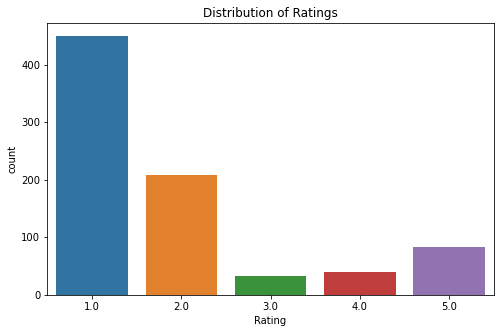

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Rating'])
plt.title("Distribution of Ratings")
plt.show()

In [21]:
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

In [43]:

nlp = spacy.load('en_core_web_sm')

def clean_string(text, stem="None"):

    final_string = ""

    text = text.lower()


    text = re.sub(r'\n', '', text)

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [23]:
df['Review'] = df['Review'].apply(lambda x: clean_string(x, stem='Stem'))

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KEYUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['Review']

0      amber ladonna starbuck southwest parkway alway...
1      starbuck fire station  altamont spring fl made...
2      want go way recogn starbuck employe billi fran...
3      friend starbuck card didn’t work thank worker ...
4      i’m kick drink  cup warm water work instacart ...
                             ...                        
841    use debit card much long starbuck compani put ...
842    bought starbuck thermo mug month half ago vaca...
844    regular custom order latt  tuesday  woman next...
845    order two venti frappacino without whip cream ...
847    demand tip made wait coffe cold melt  yet addr...
Name: Review, Length: 813, dtype: object

In [26]:
df.head()

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbuck southwest parkway alway...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbuck fire station altamont spring fl made...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,want go way recogn starbuck employe billi fran...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbuck card didn’t work thank worker ...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m kick drink cup warm water work instacart ...


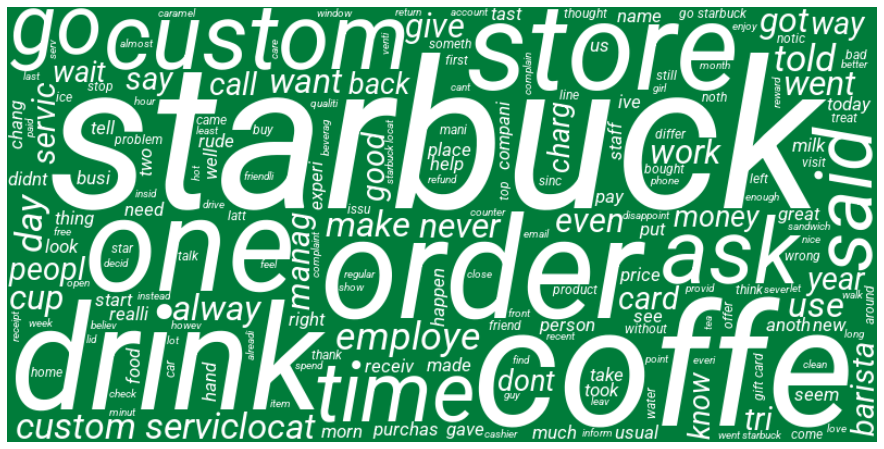

In [42]:
from collections import Counter
from wordcloud import WordCloud
text = " ".join(review for review in df['Review']) 

wordcloud = WordCloud(width=800, height=400,
                      color_func = lambda *args, **kwargs: "white",
                      random_state = 42, background_color='#007C3A',font_path = r"C:\Users\KEYUR\Downloads\Roboto\Roboto-Italic-VariableFont_wdth,wght.ttf").generate(text)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # For sentiment analysis

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KEYUR\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [30]:
analyzer = SentimentIntensityAnalyzer()

In [31]:
df['sentiment_score'] = df['Review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

In [32]:
df.head()

,name,location,Date,Rating,Review,sentiment_score
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,amber ladonna starbuck southwest parkway alway...,0.8020
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,starbuck fire station altamont spring fl made...,0.9643
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,want go way recogn starbuck employe billi fran...,0.4767
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,friend starbuck card didn’t work thank worker ...,0.9552
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,i’m kick drink cup warm water work instacart ...,0.9565


In [35]:
df.to_csv("Starbucks_review_cleaned2.csv", index=False)

In [33]:
df['sentiment_score'] = df['sentiment_score'].astype(float)

In [41]:


conditions = [
    df['sentiment_score'] > 0.7,
    (df['sentiment_score'] > 0.2) & (df['sentiment_score'] <= 0.7),
    df['sentiment_score'] <= 0.2  
]
choices = ['positive', 'neutral', 'negative']

df['sentiment_category'] = np.select(conditions, choices, default='negative')

print(df[['sentiment_score', 'sentiment_category']].head())

   sentiment_score sentiment_category
0           0.8020           positive
1           0.9643           positive
2           0.4767            neutral
3           0.9552           positive
4           0.9565           positive


In [39]:
print(df['sentiment_score'].describe())


count    813.000000
mean       0.199585
std        0.595950
min       -0.968900
25%       -0.296000
50%        0.318200
75%        0.743000
max        0.985500
Name: sentiment_score, dtype: float64


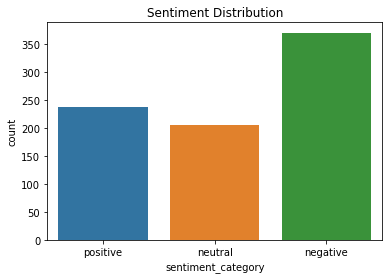

In [38]:
sns.countplot(x=df['sentiment_category'])
plt.title("Sentiment Distribution")
plt.show()